In [1]:
import sys
sys.path.insert(0, "./src/")

from test import test

c:\Users\denkm\anaconda3\envs\practical_work\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 02 - Evaluation trained models

## 02.1 Evaluate trained models

### Summary 

Robust accuracy is evaluated using an adversary with $\epsilon=0.5$, $\alpha=0.1$ and $\textrm{steps}=7$.

<table>
<center>
  <tr>
    <td></td>
    <td colspan="2"><b>Ilyas et al.</b></td>
    <td colspan="2"><b>This Work</b></td>
  </tr>
  <tr>
    <td><b>Training Method</b></td>
    <td><b>Standard Test Acc. (%)</b></td>
    <td><b>Robust Test Acc. (%)</b></td>
    <td><b>Standard Test Acc. (%)</b></td>
    <td><b>Robust Test Acc. (%)</b></td>
  </tr>
  <tr>
    <td>Standard Train on D</td>
    <td>95.25</td>
    <td>0.0</td>
    <td>82.41</td>
    <td>15.14</td>
  </tr>
  <tr>
    <td>Robust Train on D</td>
    <td>90.83</td>
    <td>70.90</td>
    <td>76.37</td>
    <td>51.27</td>
  </tr>
  <tr>
    <td>Standard Train on Dr</td>
    <td>85.40</td>
    <td>21.85</td>
    <td>69.41</td>
    <td>24.43</td>
  </tr>
  <tr>
    <td>Standard Train on Dnr</td>
    <td>87.68</td>
    <td>0.0</td>
    <td>67.11</td>
    <td>0.88</td>
  </tr>
  <tr>
    <td>Standard Train on Ddet (using standard model)</td>
    <td>43.7</td>
    <td>-</td>
    <td>33.1</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Standard Train on Drand (using standard model)</td>
    <td>63.3</td>
    <td>-</td>
    <td>40.1</td>
    <td>-</td>
  </tr>
    <tr>
  <td>Standard Train on Ddet (using robust model)</td>
    <td>5.8</td>
    <td>-</td>
    <td>46.0</td>
    <td>-</td>
  </tr>
  <tr>
    <td>Standard Train on Drand (using robust model)</td>
    <td>25.2</td>
    <td>-</td>
    <td>46.0</td>
    <td>-</td>
  </tr>
</center>
</table>

In [2]:
v = "v15"

### Evaluate standard model

In [3]:
test(f"standard_d_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.859
Adversarial test accuracy: 0.117


Assure that adversarial performance against a stronger adversary is worse.

In [4]:
test(f"standard_d_{v}/best.pt", adversary_steps=10, adversary_epsilon=0.8)

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.859
Adversarial test accuracy: 0.0277


### Evaluate robust model

In [5]:
test(f"robust_d_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.7806
Adversarial test accuracy: 0.5288


In [6]:
test(f"robust_d_{v}/best.pt", adversary_steps=10, adversary_epsilon=0.8)

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.7806
Adversarial test accuracy: 0.3734


### Evaluate models trained on Dr & Dnr

Note the improved adversarial accuracy althought only standard training was performed.

In [7]:
test(f"standard_dr_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.7154
Adversarial test accuracy: 0.2321


In constrast, standard training on Dnr yields no adversarial accuracy at all.

In [8]:
test(f"standard_dnr_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.6243
Adversarial test accuracy: 0.0003


### Evaluate models trained on Ddet & Drand

Note the non-trivial standard accuracy that is achieved by training only on non-robust features.

In [15]:
test(f"standard_ddet_eps2_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.3266
Adversarial test accuracy: 0.0


In [14]:
test(f"standard_drand_eps2_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.381
Adversarial test accuracy: 0.0021


In [10]:
test(f"standard_ddet_eps0.5_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.1333
Adversarial test accuracy: 0.1004


In [11]:
test(f"standard_drand_eps0.5_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.1212
Adversarial test accuracy: 0.079


As sanity check, observe that when using data, that was extracted by finding non-robust features from the robust model, such non-trivial accuracy cannot be attained.

In [12]:
test(f"standard_drand_eps0.5_robust_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.1234
Adversarial test accuracy: 0.0658


In [16]:
test(f"standard_ddet_robust_eps0.5_{v}/best.pt")

Files already downloaded and verified
Files already downloaded and verified
Initialized everything, starting testing...
Standard test accuracy: 0.0939
Adversarial test accuracy: 0.0684


## 02.2 Evaluate modified data

In [134]:
from src.utils.data_utils import get_cifar10_data


data = get_cifar10_data(128, img_size=32, seed=0)
classes = data["classes"]
_, train_loader = data["train"]
_, val_laoder = data["val"]
_, test_loader = data["test"]

Files already downloaded and verified
Files already downloaded and verified


c:\Users\denkm\anaconda3\envs\practical_work\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


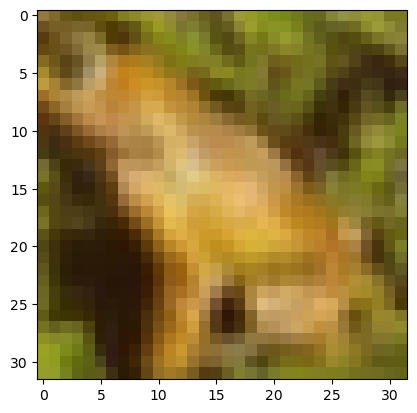

In [135]:
for b in train_loader:
    plt.imshow(b[0][1].numpy().transpose(1,2,0))
    break

In [18]:
import glob
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision
import torch
import torch.nn as nn

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

As for Ilyas et al., the $\mathcal{D_{NR}}$ images tend to resemble more the source image than the target image.

bird


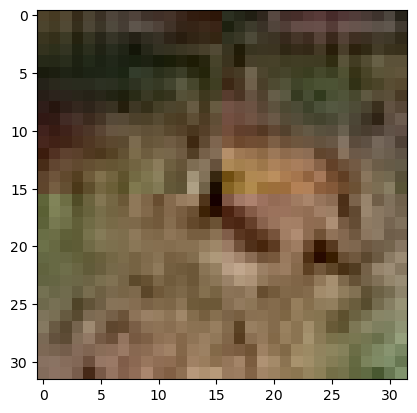

ship


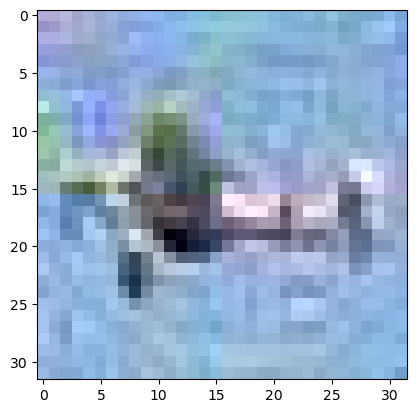

frog


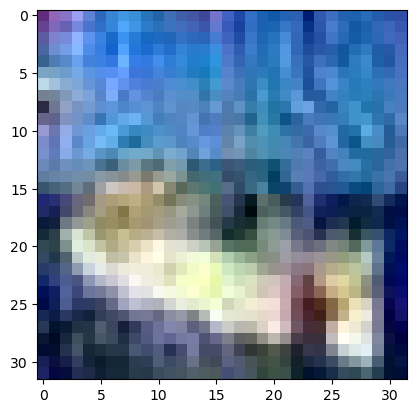

In [152]:
data_path = "data/d_nr/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()
img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+2}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+2]]}")

frog


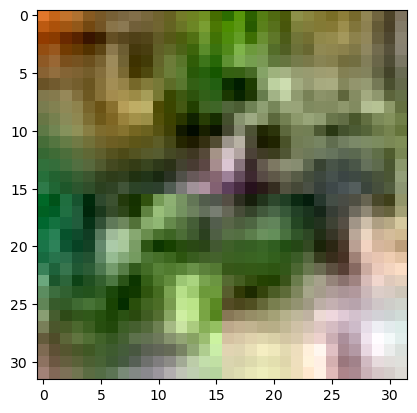

horse


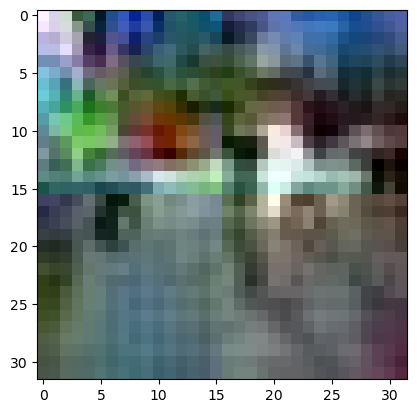

cat


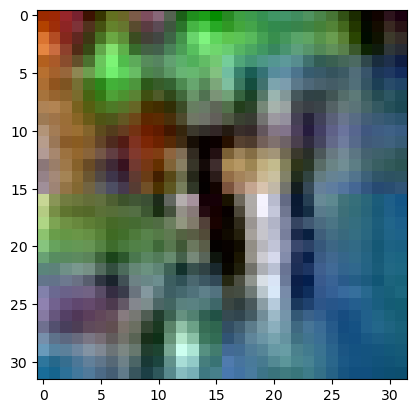

In [153]:
data_path = "data/d_r/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+2}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+2]]}")

In [60]:
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


cat


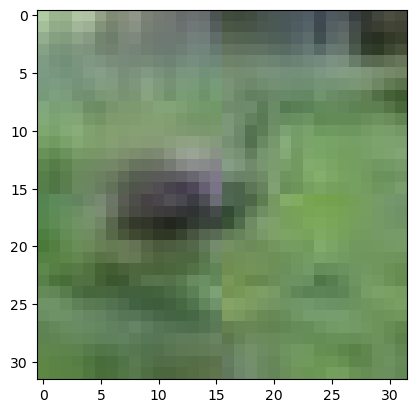

truck


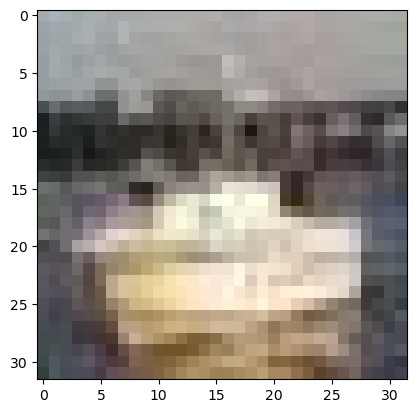

In [154]:
data_path = "data/d_det_eps0.5/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

cat


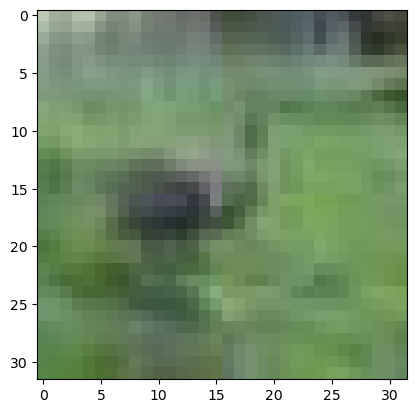

truck


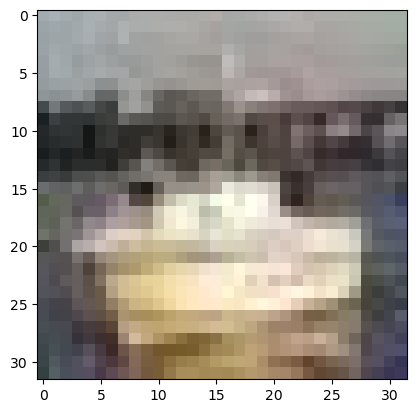

In [175]:
data_path = "data/d_det_robust_eps0.5/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

cat


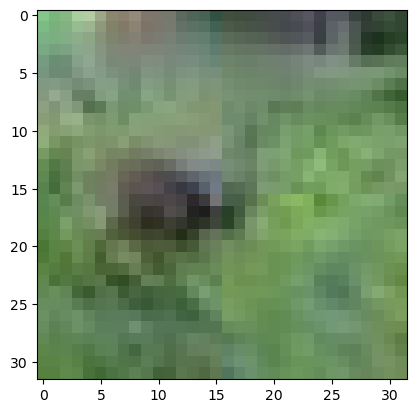

truck


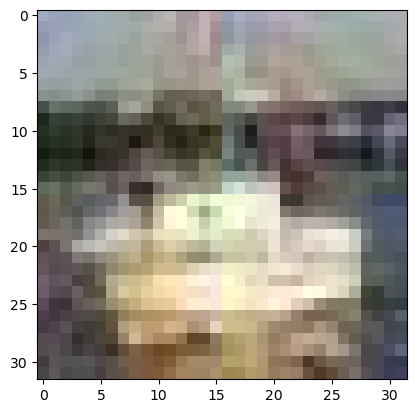

In [155]:
data_path = "data/d_det_eps2/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

cat


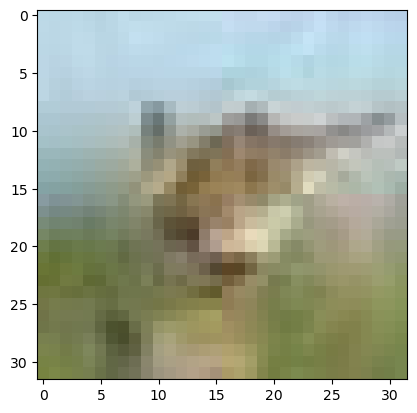

car


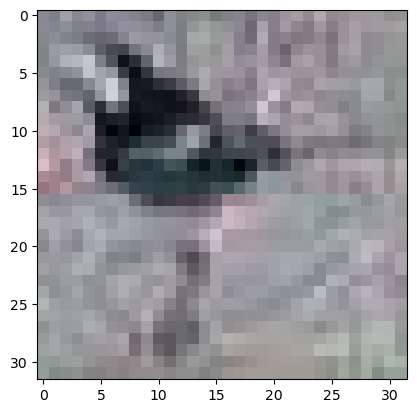

In [156]:
data_path = "data/d_rand_eps1/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

ship


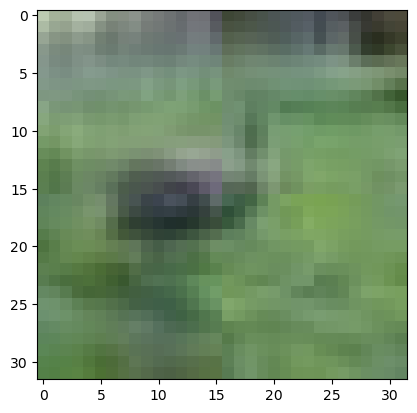

cat


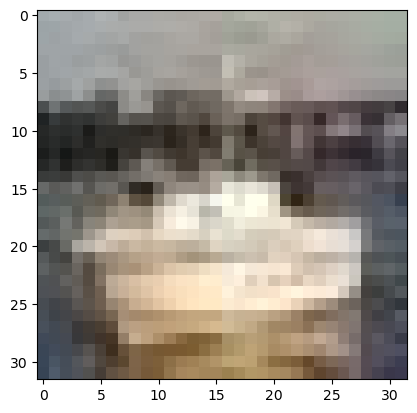

In [178]:
data_path = "data/d_rand_robust_eps0.5/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

ship


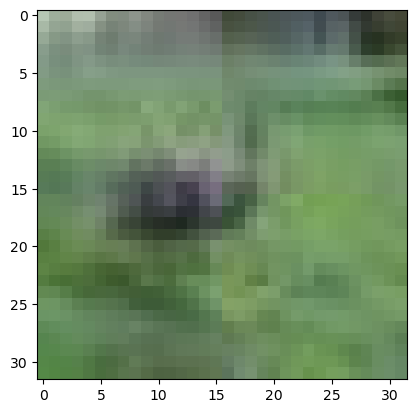

cat


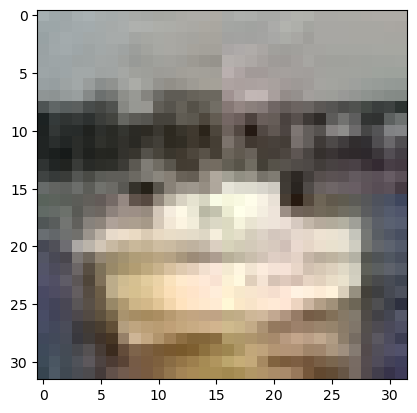

In [170]:
data_path = "data/d_rand_eps0.5/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")

ship


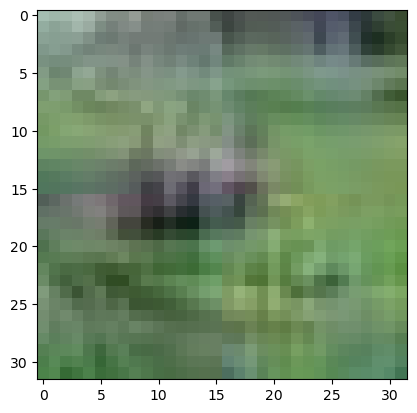

cat


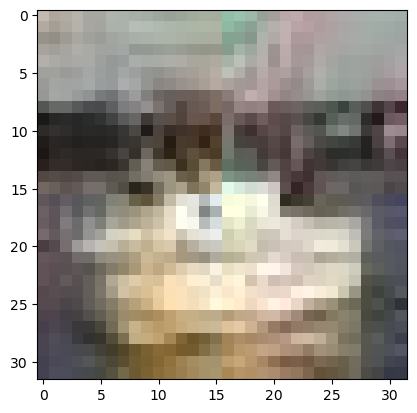

In [176]:
data_path = "data/d_rand_eps_2/"
with open(os.path.join(data_path, "labels.pkl"), "rb") as file:
    labels = pickle.load(file)
rand_idx = 1
img_path = os.path.join(data_path, "img", f"{rand_idx}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx]]}")
plt.show()

img_path = os.path.join(data_path, "img", f"{rand_idx+1}.jpg")
img = np.array(Image.open(img_path))
plt.imshow(img)
print(f"{classes[labels[rand_idx+1]]}")